In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [38]:
import pickle

In [39]:
df = pd.read_csv("wesad-eda-SSQ.csv")

In [40]:
df.head()

,subject id,ALSC,INSC,APSC,RMSC,INSC_LOG,APSC_LOG,RMSC_LOG,ALSC_LOG,APSC_LOG_LOG,ALSC_LOG_LOG,APSC_BOXCOX,RMSC_BOXCOX,APSC_YEO_JONSON,RMSC_YEO_JONSON,RMSC_SQUARED,INSC_APSC,SSSQ Label
0,9,210031.6038,3.932994e+05,3.515246,1.874899,12.882329,1.507460,1.056018,12.255018,0.919270,2.584376,1.050209,0.525105,1.132734,0.654990,3.515246,111883.86860,0
1,9,210013.3841,7.434861e+05,12.558390,3.543782,13.519107,2.607006,1.513760,12.254931,1.282878,2.584370,1.782496,0.891248,1.620374,0.784360,12.558390,59202.34270,0
2,16,210014.4163,9.557294e+05,20.775159,4.557978,13.770231,3.080770,1.715234,12.254936,1.406286,2.584370,2.418240,1.209120,1.971453,0.987237,20.775159,46003.47215,0
3,5,210023.7602,9.045087e+05,18.639046,4.317296,13.715148,2.977520,1.670965,12.254981,1.380658,2.584373,6.632540,3.316270,6.747423,4.458571,18.639046,48527.62864,2
4,17,210006.0715,1.157108e+06,30.361335,5.510112,13.961436,3.445576,1.873357,12.254896,1.491909,2.584367,1.902228,0.951114,1.847850,0.849475,30.361335,38111.24882,0


In [41]:
df.shape

(33948, 18)

In [42]:
len(df['subject id'].unique())

15

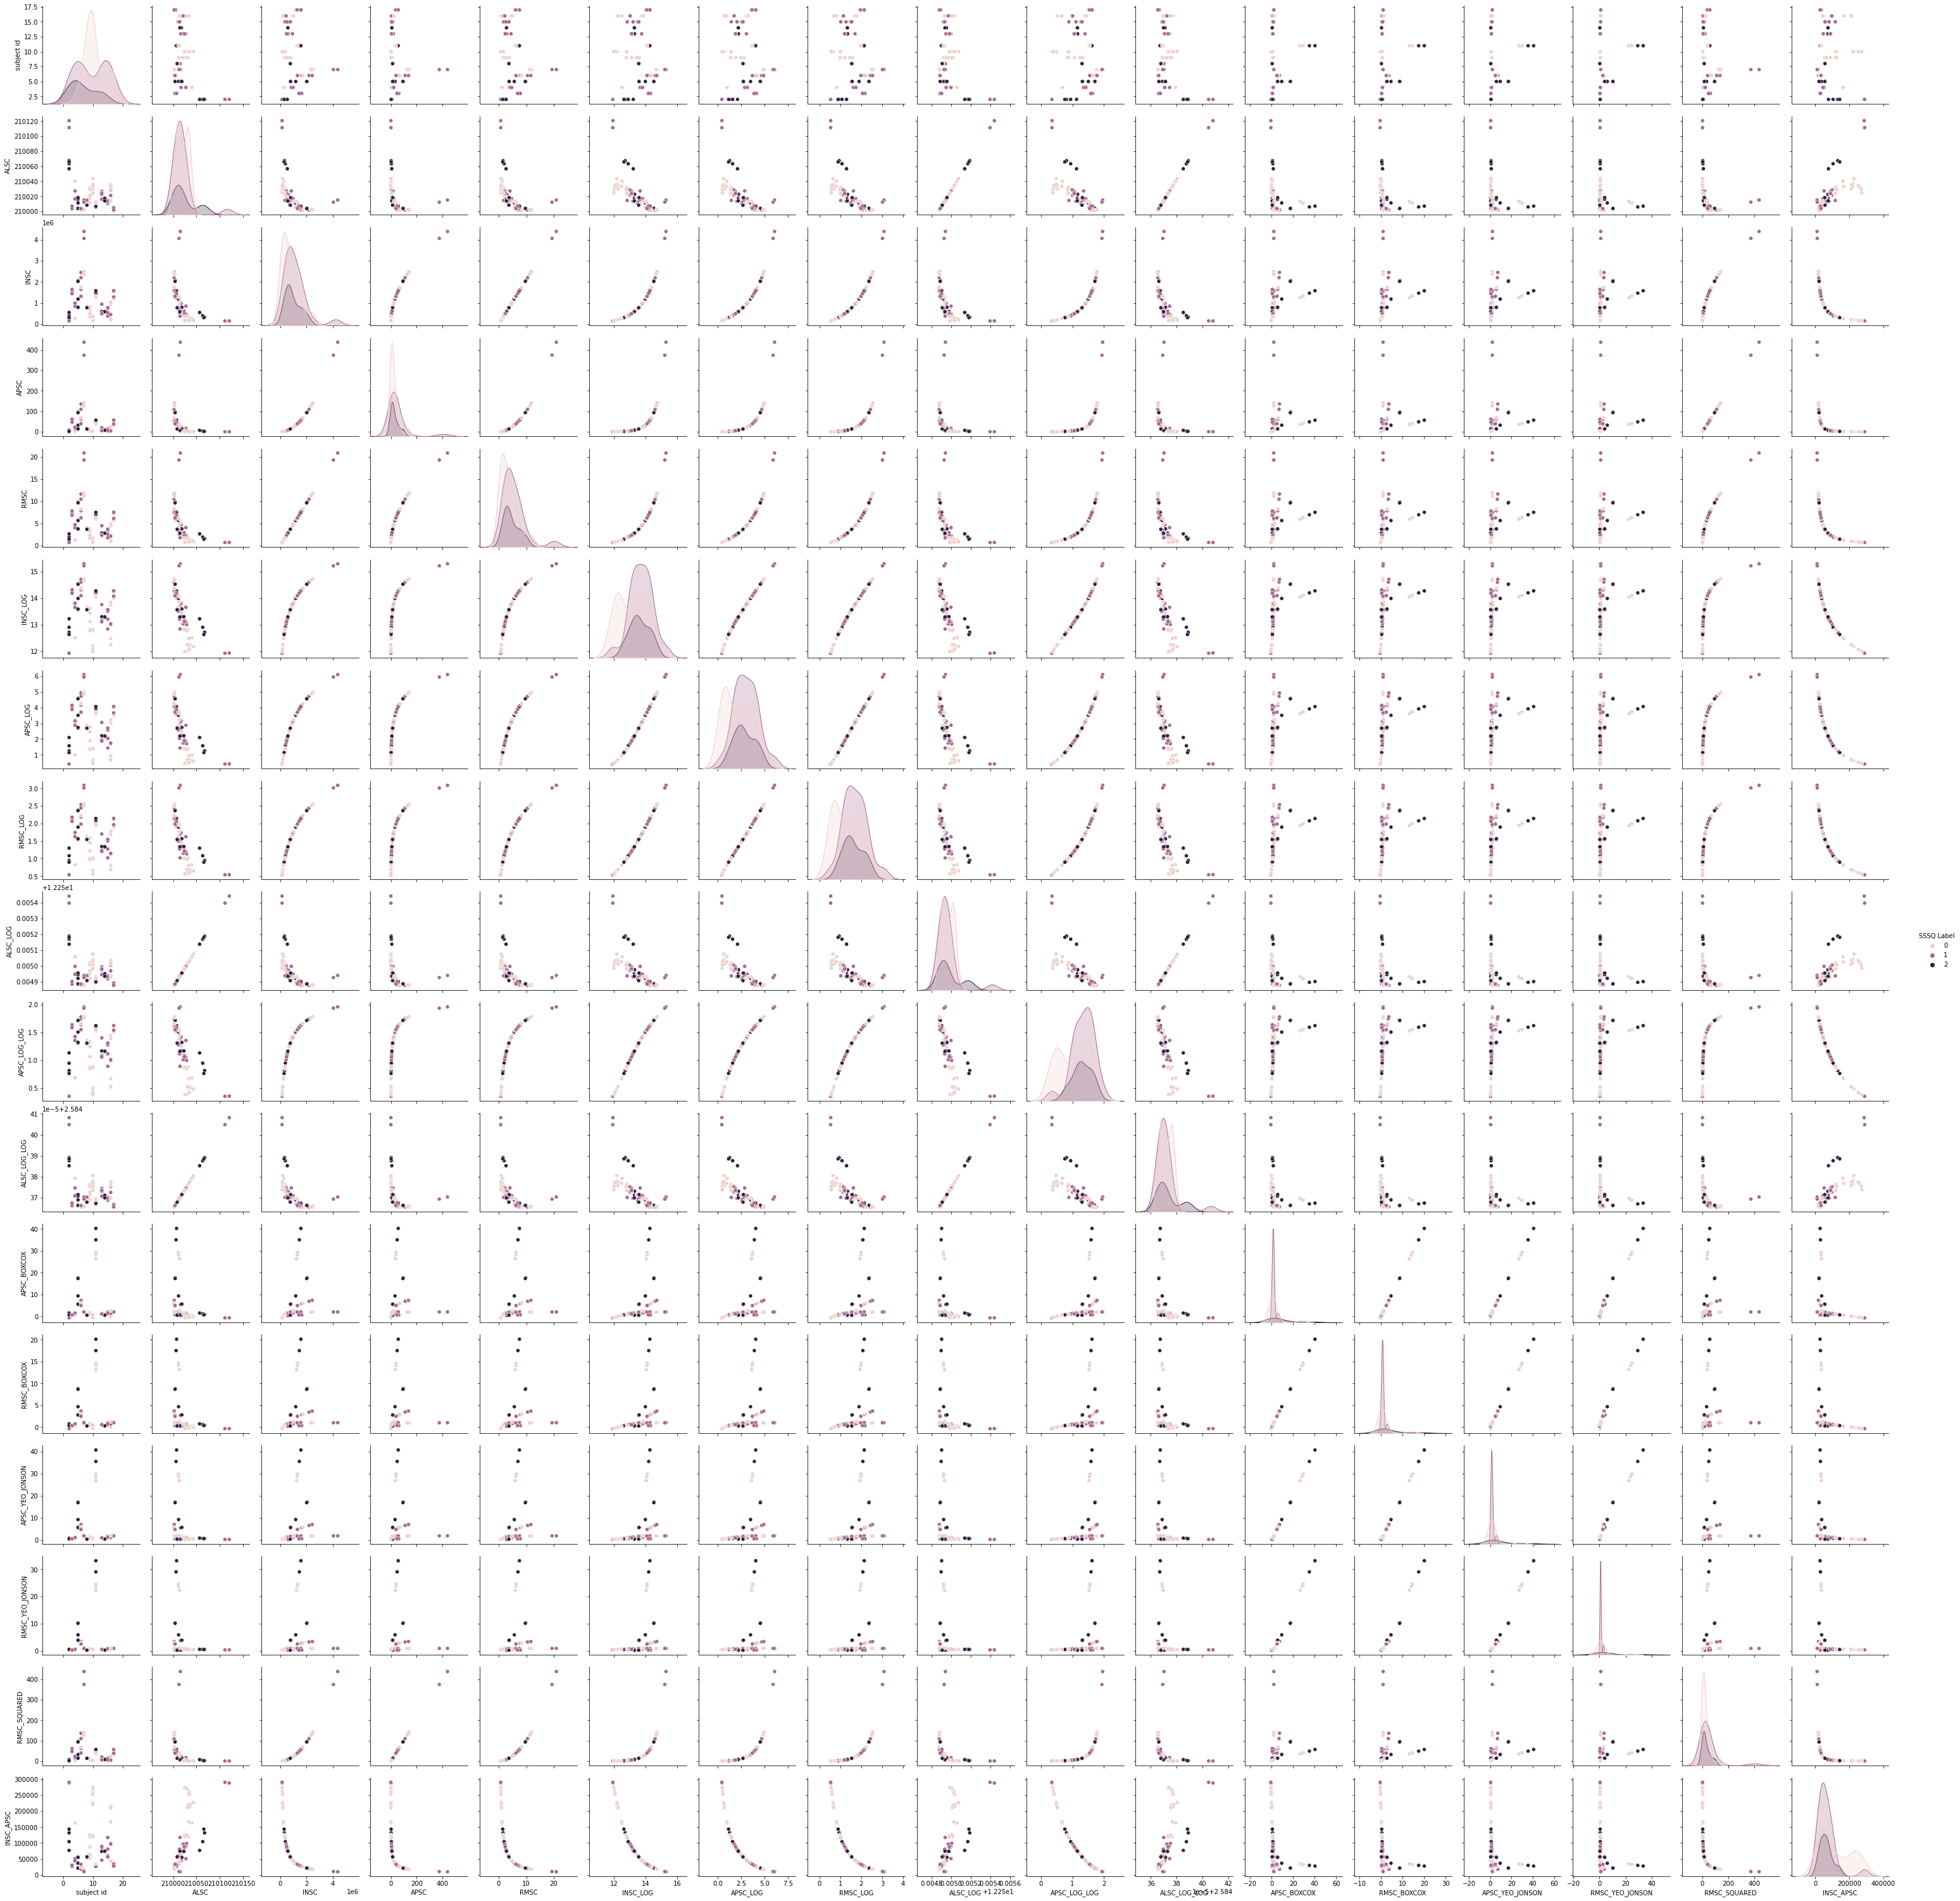

In [43]:
sns.pairplot(df.sample(100), hue = 'SSSQ Label')

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33948 entries, 0 to 33947
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   subject id       33948 non-null  int64  
 1   ALSC             33948 non-null  float64
 2   INSC             33948 non-null  float64
 3   APSC             33948 non-null  float64
 4   RMSC             33948 non-null  float64
 5   INSC_LOG         33948 non-null  float64
 6   APSC_LOG         33948 non-null  float64
 7   RMSC_LOG         33948 non-null  float64
 8   ALSC_LOG         33948 non-null  float64
 9   APSC_LOG_LOG     33948 non-null  float64
 10  ALSC_LOG_LOG     33948 non-null  float64
 11  APSC_BOXCOX      33948 non-null  float64
 12  RMSC_BOXCOX      33948 non-null  float64
 13  APSC_YEO_JONSON  33948 non-null  float64
 14  RMSC_YEO_JONSON  33948 non-null  float64
 15  RMSC_SQUARED     33948 non-null  float64
 16  INSC_APSC        33948 non-null  float64
 17  SSSQ Label  

In [45]:
""" 
SSSQ Label
baseline/neutral - 0
amusement/happy - 1
stress/sad - 2
"""

"""
low - 0
medium - 1
high - 2
"""

'\nlow - 0\nmedium - 1\nhigh - 2\n'

In [46]:
df.columns

Index(['subject id', 'ALSC', 'INSC', 'APSC', 'RMSC', 'INSC_LOG', 'APSC_LOG',
       'RMSC_LOG', 'ALSC_LOG', 'APSC_LOG_LOG', 'ALSC_LOG_LOG', 'APSC_BOXCOX',
       'RMSC_BOXCOX', 'APSC_YEO_JONSON', 'RMSC_YEO_JONSON', 'RMSC_SQUARED',
       'INSC_APSC', 'SSSQ Label'],
      dtype='object')

c:\ProgramData\Miniconda3\envs\DLML\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Class Distribution')

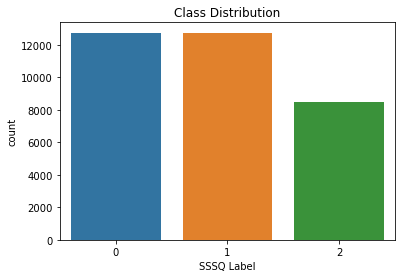

In [47]:
sns.countplot(df['SSSQ Label'])
plt.title('Class Distribution')

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33948 entries, 0 to 33947
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   subject id       33948 non-null  int64  
 1   ALSC             33948 non-null  float64
 2   INSC             33948 non-null  float64
 3   APSC             33948 non-null  float64
 4   RMSC             33948 non-null  float64
 5   INSC_LOG         33948 non-null  float64
 6   APSC_LOG         33948 non-null  float64
 7   RMSC_LOG         33948 non-null  float64
 8   ALSC_LOG         33948 non-null  float64
 9   APSC_LOG_LOG     33948 non-null  float64
 10  ALSC_LOG_LOG     33948 non-null  float64
 11  APSC_BOXCOX      33948 non-null  float64
 12  RMSC_BOXCOX      33948 non-null  float64
 13  APSC_YEO_JONSON  33948 non-null  float64
 14  RMSC_YEO_JONSON  33948 non-null  float64
 15  RMSC_SQUARED     33948 non-null  float64
 16  INSC_APSC        33948 non-null  float64
 17  SSSQ Label  

In [49]:
x = df.drop('SSSQ Label', axis = 1).values
y = df['SSSQ Label'].values

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, classification_report

In [51]:
def modelRandomForest(x, y):
    # Train Test Split
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)  
    
    # Normalizing the values
    sc = StandardScaler()  
    x_train = sc.fit_transform(x_train)  
    x_test = sc.transform(x_test) 
    
    # Random Forest Classification
    RF_Classifier = RandomForestClassifier(max_depth = 4, random_state = 0) 
    RF_Classifier.fit(x_train, y_train)  
    y_pred = RF_Classifier.predict(x_test)
    
    # Results from Random Forest Classification
    print("Confusion Matrix (Random Forest): \n", confusion_matrix(y_test, y_pred))
    print("\n\n")
    print('Accuracy (Random Forest):    ', (np.round(accuracy_score(y_test, y_pred), 3)))
    print('F1 score (Random Forest):    ', (np.round(f1_score(y_test, y_pred, average = 'macro'), 3)))
    print('Recall (Random Forest):      ', (np.round(recall_score(y_test, y_pred, average = 'macro'), 3))) 
    print("\n\n")
    
    # Classification Report
    print('Classification Report (Random Forest):   \n\n', classification_report(y_test, y_pred))
    
    # Storing the model
    with open('pickle/RF_Classifier.pickle', 'wb') as f:
        pickle.dump(RF_Classifier, f)
    

In [52]:
def modelSVM(x, y):
    # Train Test Split
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)  
    
    # Normalizing the values
    sc = StandardScaler()  
    x_train = sc.fit_transform(x_train)  
    x_test = sc.transform(x_test) 
    
    # SVM 
    SVM_Classifier = SVC() 
    SVM_Classifier.fit(x_train, y_train)  
    y_pred = SVM_Classifier.predict(x_test)
    
    # Results from SVM
    print("Confusion Matrix (SVM): \n", confusion_matrix(y_test, y_pred))
    print("\n\n")
    print('Accuracy (SVM):    ', (np.round(accuracy_score(y_test, y_pred), 3)))
    print('F1 score (SVM):    ', (np.round(f1_score(y_test, y_pred, average = 'macro'), 3)))
    print('Recall (SVM):      ', (np.round(recall_score(y_test, y_pred, average = 'macro'), 3))) 
    print("\n\n")
    
    # Classification Report
    print('Classification Report (SVM):   \n\n', classification_report(y_test, y_pred))
    
    # Storing the model 
    with open('pickle/SVM_Classifier.pickle', 'wb') as f:
        pickle.dump(SVM_Classifier, f)
    

In [53]:
from sklearn.neighbors import KNeighborsClassifier

In [54]:
def modelKMeans(x, y):
    # Train Test Split
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)  
    
    # Normalizing the values
    sc = StandardScaler()  
    x_train = sc.fit_transform(x_train)  
    x_test = sc.transform(x_test) 
    
    # KNN 
    KNN = KNeighborsClassifier(n_neighbors = 6) 
    KNN.fit(x_train, y_train)  
    y_pred = KNN.predict(x_test)
    
    # Results from KNN
    print("Confusion Matrix (KNN): \n", confusion_matrix(y_test, y_pred))
    print("\n\n")
    print('Accuracy (KNN):    ', (np.round(accuracy_score(y_test, y_pred), 3)))
    print('F1 score (KNN):    ', (np.round(f1_score(y_test, y_pred, average = 'macro'), 3)))
    print('Recall (KNN):      ', (np.round(recall_score(y_test, y_pred, average = 'macro'), 3))) 
    print("\n\n")
    
    # Classification Report
    print('Classification Report (KNN):   \n\n', classification_report(y_test, y_pred))
    
    # Storing the model 
    with open('pickle/KNN_Classifier.pickle', 'wb') as f:
        pickle.dump(KNN, f)
        
    print("Dumped into a pickle file")
    
    # Testing the model
    
    # data1 = ['26008566.595878545','54999655100395.88','24806708.89713942','7416175.233932642']
    # data1np = np.reshape(data1, (1, -1))
    
   # KNN.predict(data1np)
    

In [55]:
RF = modelRandomForest(x, y)

Confusion Matrix (Random Forest): 
 [[1436 1018   78]
 [   0 2523    0]
 [   0  214 1521]]



Accuracy (Random Forest):     0.807
F1 score (Random Forest):     0.813
Recall (Random Forest):       0.815



Classification Report (Random Forest):   

               precision    recall  f1-score   support

           0       1.00      0.57      0.72      2532
           1       0.67      1.00      0.80      2523
           2       0.95      0.88      0.91      1735

    accuracy                           0.81      6790
   macro avg       0.87      0.81      0.81      6790
weighted avg       0.87      0.81      0.80      6790



In [56]:
SVM = modelSVM(x, y)

Confusion Matrix (SVM): 
 [[2301  158   73]
 [ 266 2257    0]
 [ 148   87 1500]]



Accuracy (SVM):     0.892
F1 score (SVM):     0.894
Recall (SVM):       0.889



Classification Report (SVM):   

               precision    recall  f1-score   support

           0       0.85      0.91      0.88      2532
           1       0.90      0.89      0.90      2523
           2       0.95      0.86      0.91      1735

    accuracy                           0.89      6790
   macro avg       0.90      0.89      0.89      6790
weighted avg       0.89      0.89      0.89      6790



In [57]:
KNN = modelKMeans(x,y)

Confusion Matrix (KNN): 
 [[2529    2    1]
 [   0 2523    0]
 [   2    7 1726]]



Accuracy (KNN):     0.998
F1 score (KNN):     0.998
Recall (KNN):       0.998



Classification Report (KNN):   

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2532
           1       1.00      1.00      1.00      2523
           2       1.00      0.99      1.00      1735

    accuracy                           1.00      6790
   macro avg       1.00      1.00      1.00      6790
weighted avg       1.00      1.00      1.00      6790

Dumped into a pickle file


In [58]:
cdf = pd.concat([df.drop('SSSQ Label', axis = 1), pd.get_dummies(df['SSSQ Label'])], axis=1)

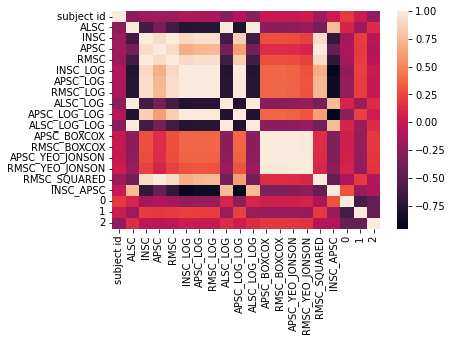

In [59]:
corr = cdf.corr()
plt.figure()#(figsize=(16, 10))
sns.heatmap(corr);

In [60]:
# Raw Features
raw_feats = ['subject id', 'ALSC', 'INSC', 'APSC', 'RMSC', 'SSSQ Label']

# Logrithmic Transformation
log_feats = ['subject id', 'ALSC_LOG', 'INSC_LOG', 'APSC_LOG', 'RMSC_LOG', 'SSSQ Label']

# Log over logrithmic Transformation
loglog_feats = ['subject id', 'ALSC_LOG_LOG', 'APSC_LOG_LOG', 'SSSQ Label'] # RMSC INSC

# Box Cox Transformation
boxCox_feats = ['subject id', 'APSC_BOXCOX', 'RMSC_BOXCOX', 'SSSQ Label'] # INSC ALSC 

# Yeo Jonson Transformation
YJ_feats = ['subject id', 'APSC_YEO_JONSON', 'RMSC_YEO_JONSON', 'SSSQ Label'] # ALSC INSC

Raw Features

In [61]:
df_raw = df[raw_feats]

In [62]:
df_raw.head()

,subject id,ALSC,INSC,APSC,RMSC,SSSQ Label
0,9,210031.6038,3.932994e+05,3.515246,1.874899,0
1,9,210013.3841,7.434861e+05,12.558390,3.543782,0
2,16,210014.4163,9.557294e+05,20.775159,4.557978,0
3,5,210023.7602,9.045087e+05,18.639046,4.317296,2
4,17,210006.0715,1.157108e+06,30.361335,5.510112,0


In [63]:
cdf = pd.concat([df_raw.drop('SSSQ Label', axis = 1), pd.get_dummies(df_raw['SSSQ Label'])], axis=1)

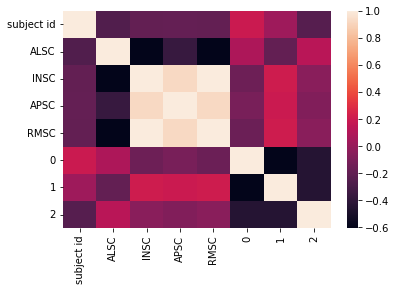

In [64]:
corr = cdf.corr()
plt.figure()#(figsize=(16, 10))
sns.heatmap(corr);

In [65]:
x = df_raw.drop('SSSQ Label', axis = 1).values
y = df_raw['SSSQ Label'].values

In [66]:
modelRandomForest(x, y)

Confusion Matrix (Random Forest): 
 [[2015  372  145]
 [ 368 2154    1]
 [   0  194 1541]]



Accuracy (Random Forest):     0.841
F1 score (Random Forest):     0.847
Recall (Random Forest):       0.846



Classification Report (Random Forest):   

               precision    recall  f1-score   support

           0       0.85      0.80      0.82      2532
           1       0.79      0.85      0.82      2523
           2       0.91      0.89      0.90      1735

    accuracy                           0.84      6790
   macro avg       0.85      0.85      0.85      6790
weighted avg       0.84      0.84      0.84      6790



In [67]:
modelSVM(x, y)

Confusion Matrix (SVM): 
 [[2273  186   73]
 [ 211 2299   13]
 [ 148  310 1277]]



Accuracy (SVM):     0.861
F1 score (SVM):     0.856
Recall (SVM):       0.848



Classification Report (SVM):   

               precision    recall  f1-score   support

           0       0.86      0.90      0.88      2532
           1       0.82      0.91      0.86      2523
           2       0.94      0.74      0.82      1735

    accuracy                           0.86      6790
   macro avg       0.87      0.85      0.86      6790
weighted avg       0.87      0.86      0.86      6790



In [68]:
modelKMeans(x, y)

Confusion Matrix (KNN): 
 [[2526    5    1]
 [   0 2523    0]
 [   3    7 1725]]



Accuracy (KNN):     0.998
F1 score (KNN):     0.998
Recall (KNN):       0.997



Classification Report (KNN):   

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2532
           1       1.00      1.00      1.00      2523
           2       1.00      0.99      1.00      1735

    accuracy                           1.00      6790
   macro avg       1.00      1.00      1.00      6790
weighted avg       1.00      1.00      1.00      6790

Dumped into a pickle file


Log Features

In [69]:
df_log = df[log_feats]
df_log.head()

,subject id,ALSC_LOG,INSC_LOG,APSC_LOG,RMSC_LOG,SSSQ Label
0,9,12.255018,12.882329,1.507460,1.056018,0
1,9,12.254931,13.519107,2.607006,1.513760,0
2,16,12.254936,13.770231,3.080770,1.715234,0
3,5,12.254981,13.715148,2.977520,1.670965,2
4,17,12.254896,13.961436,3.445576,1.873357,0


In [70]:
cdf = pd.concat([df_log.drop('SSSQ Label', axis = 1), pd.get_dummies(df_log['SSSQ Label'])], axis=1)

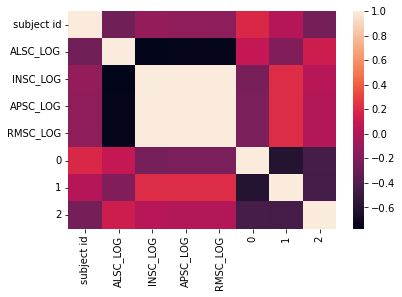

In [71]:
corr = cdf.corr()
plt.figure()#(figsize=(16, 10))
sns.heatmap(corr);

In [72]:
x = df_log.drop('SSSQ Label', axis = 1).values
y = df_log['SSSQ Label'].values

In [73]:
modelRandomForest(x, y)

Confusion Matrix (Random Forest): 
 [[2015  372  145]
 [ 368 2154    1]
 [   0  194 1541]]



Accuracy (Random Forest):     0.841
F1 score (Random Forest):     0.847
Recall (Random Forest):       0.846



Classification Report (Random Forest):   

               precision    recall  f1-score   support

           0       0.85      0.80      0.82      2532
           1       0.79      0.85      0.82      2523
           2       0.91      0.89      0.90      1735

    accuracy                           0.84      6790
   macro avg       0.85      0.85      0.85      6790
weighted avg       0.84      0.84      0.84      6790



In [74]:
modelSVM(x, y)

Confusion Matrix (SVM): 
 [[2326  133   73]
 [ 188 2261   74]
 [  36  247 1452]]



Accuracy (SVM):     0.889
F1 score (SVM):     0.887
Recall (SVM):       0.884



Classification Report (SVM):   

               precision    recall  f1-score   support

           0       0.91      0.92      0.92      2532
           1       0.86      0.90      0.88      2523
           2       0.91      0.84      0.87      1735

    accuracy                           0.89      6790
   macro avg       0.89      0.88      0.89      6790
weighted avg       0.89      0.89      0.89      6790



In [75]:
modelKMeans(x, y)

Confusion Matrix (KNN): 
 [[2528    2    2]
 [   0 2523    0]
 [   4    7 1724]]



Accuracy (KNN):     0.998
F1 score (KNN):     0.998
Recall (KNN):       0.997



Classification Report (KNN):   

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2532
           1       1.00      1.00      1.00      2523
           2       1.00      0.99      1.00      1735

    accuracy                           1.00      6790
   macro avg       1.00      1.00      1.00      6790
weighted avg       1.00      1.00      1.00      6790

Dumped into a pickle file


Log Log Features

In [76]:
# Logarithmic Transofrmation
import math
def log_transform(x):
    return math.log(x)

In [77]:
df_loglog = df[loglog_feats]
df_loglog.head()

,subject id,ALSC_LOG_LOG,APSC_LOG_LOG,SSSQ Label
0,9,2.584376,0.919270,0
1,9,2.584370,1.282878,0
2,16,2.584370,1.406286,0
3,5,2.584373,1.380658,2
4,17,2.584367,1.491909,0


In [78]:
x = df_loglog.drop('SSSQ Label', axis = 1).values
y = df_loglog['SSSQ Label'].values

In [79]:
modelRandomForest(x, y)

Confusion Matrix (Random Forest): 
 [[2032  408   92]
 [  73 2445    5]
 [ 209   93 1433]]



Accuracy (Random Forest):     0.87
F1 score (Random Forest):     0.87
Recall (Random Forest):       0.866



Classification Report (Random Forest):   

               precision    recall  f1-score   support

           0       0.88      0.80      0.84      2532
           1       0.83      0.97      0.89      2523
           2       0.94      0.83      0.88      1735

    accuracy                           0.87      6790
   macro avg       0.88      0.87      0.87      6790
weighted avg       0.88      0.87      0.87      6790



In [80]:
modelSVM(x, y)

Confusion Matrix (SVM): 
 [[2309  150   73]
 [ 149 2342   32]
 [  82  151 1502]]



Accuracy (SVM):     0.906
F1 score (SVM):     0.905
Recall (SVM):       0.902



Classification Report (SVM):   

               precision    recall  f1-score   support

           0       0.91      0.91      0.91      2532
           1       0.89      0.93      0.91      2523
           2       0.93      0.87      0.90      1735

    accuracy                           0.91      6790
   macro avg       0.91      0.90      0.91      6790
weighted avg       0.91      0.91      0.91      6790



In [81]:
modelKMeans(x, y)

Confusion Matrix (KNN): 
 [[2530    1    1]
 [   2 2520    1]
 [   3    3 1729]]



Accuracy (KNN):     0.998
F1 score (KNN):     0.998
Recall (KNN):       0.998



Classification Report (KNN):   

               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2532
           1       1.00      1.00      1.00      2523
           2       1.00      1.00      1.00      1735

    accuracy                           1.00      6790
   macro avg       1.00      1.00      1.00      6790
weighted avg       1.00      1.00      1.00      6790

Dumped into a pickle file


BoxCox Features

In [82]:
df_boxCox = df[boxCox_feats]
df_boxCox.head()

,subject id,APSC_BOXCOX,RMSC_BOXCOX,SSSQ Label
0,9,1.050209,0.525105,0
1,9,1.782496,0.891248,0
2,16,2.418240,1.209120,0
3,5,6.632540,3.316270,2
4,17,1.902228,0.951114,0


In [83]:
x = df_boxCox.drop('SSSQ Label', axis = 1).values
y = df_boxCox['SSSQ Label'].values

In [84]:
modelRandomForest(x, y)

Confusion Matrix (Random Forest): 
 [[1614  912    6]
 [   0 2522    1]
 [  74  205 1456]]



Accuracy (Random Forest):     0.824
F1 score (Random Forest):     0.831
Recall (Random Forest):       0.825



Classification Report (Random Forest):   

               precision    recall  f1-score   support

           0       0.96      0.64      0.76      2532
           1       0.69      1.00      0.82      2523
           2       1.00      0.84      0.91      1735

    accuracy                           0.82      6790
   macro avg       0.88      0.83      0.83      6790
weighted avg       0.87      0.82      0.82      6790



In [85]:
modelSVM(x, y)

Confusion Matrix (SVM): 
 [[1995  464   73]
 [ 646 1877    0]
 [ 148  208 1379]]



Accuracy (SVM):     0.773
F1 score (SVM):     0.785
Recall (SVM):       0.776



Classification Report (SVM):   

               precision    recall  f1-score   support

           0       0.72      0.79      0.75      2532
           1       0.74      0.74      0.74      2523
           2       0.95      0.79      0.87      1735

    accuracy                           0.77      6790
   macro avg       0.80      0.78      0.79      6790
weighted avg       0.78      0.77      0.78      6790



In [86]:
modelKMeans(x, y)

Confusion Matrix (KNN): 
 [[2407   84   41]
 [  51 2456   16]
 [  42   13 1680]]



Accuracy (KNN):     0.964
F1 score (KNN):     0.964
Recall (KNN):       0.964



Classification Report (KNN):   

               precision    recall  f1-score   support

           0       0.96      0.95      0.96      2532
           1       0.96      0.97      0.97      2523
           2       0.97      0.97      0.97      1735

    accuracy                           0.96      6790
   macro avg       0.96      0.96      0.96      6790
weighted avg       0.96      0.96      0.96      6790

Dumped into a pickle file


Yeo Jonson Features 

In [87]:
df_YJ = df[YJ_feats]
df_YJ.head()

,subject id,APSC_YEO_JONSON,RMSC_YEO_JONSON,SSSQ Label
0,9,1.132734,0.654990,0
1,9,1.620374,0.784360,0
2,16,1.971453,0.987237,0
3,5,6.747423,4.458571,2
4,17,1.847850,0.849475,0


In [88]:
x = df_YJ.drop('SSSQ Label', axis = 1).values
y = df_YJ['SSSQ Label'].values

In [89]:
modelRandomForest(x, y)

Confusion Matrix (Random Forest): 
 [[1767  758    7]
 [  87 2436    0]
 [  74  129 1532]]



Accuracy (Random Forest):     0.845
F1 score (Random Forest):     0.854
Recall (Random Forest):       0.849



Classification Report (Random Forest):   

               precision    recall  f1-score   support

           0       0.92      0.70      0.79      2532
           1       0.73      0.97      0.83      2523
           2       1.00      0.88      0.94      1735

    accuracy                           0.84      6790
   macro avg       0.88      0.85      0.85      6790
weighted avg       0.87      0.84      0.84      6790



In [90]:
modelSVM(x, y)

Confusion Matrix (SVM): 
 [[1995  464   73]
 [ 674 1775   74]
 [ 148  208 1379]]



Accuracy (SVM):     0.758
F1 score (SVM):     0.769
Recall (SVM):       0.762



Classification Report (SVM):   

               precision    recall  f1-score   support

           0       0.71      0.79      0.75      2532
           1       0.73      0.70      0.71      2523
           2       0.90      0.79      0.85      1735

    accuracy                           0.76      6790
   macro avg       0.78      0.76      0.77      6790
weighted avg       0.76      0.76      0.76      6790



In [91]:
modelKMeans(x, y)

Confusion Matrix (KNN): 
 [[2407   84   41]
 [  51 2456   16]
 [  42   13 1680]]



Accuracy (KNN):     0.964
F1 score (KNN):     0.964
Recall (KNN):       0.964



Classification Report (KNN):   

               precision    recall  f1-score   support

           0       0.96      0.95      0.96      2532
           1       0.96      0.97      0.97      2523
           2       0.97      0.97      0.97      1735

    accuracy                           0.96      6790
   macro avg       0.96      0.96      0.96      6790
weighted avg       0.96      0.96      0.96      6790

Dumped into a pickle file
